In [9]:
#!pip install opencv-python

###### COVID-19 detection on CT images

This model will help us to identify covid-19 infected patients with the CT scan images
The CT Scan images where used to figure out whether a person is infected from corona or not.Convolutional neural network is used to build such a model

Importing required libraries and  COVID-19 infected and not infected X-ray images to work Space.


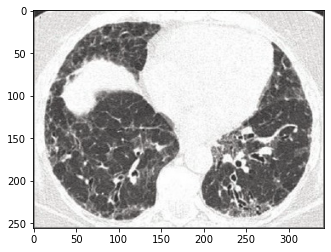

In [5]:
import os
import tensorflow as tf 
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('C:\\Users\\user\\Desktop\\ADV ML\\Train\\NON_COVID\\25%2.jpg')
plt.imshow(image)

This image is indicating,the person who is not infected by covid-19.

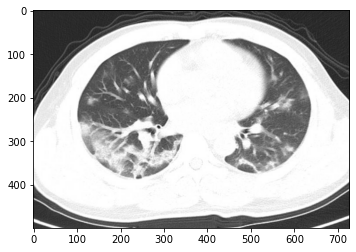

In [14]:

image1 = plt.imread("C:\\Users\\user\\Desktop\\ADV ML\\Train\\COVID_19\\2020.01.24.919183-p27-135.png")
plt.imshow(image1)

This image is indicating,the person who is infected by covid-19

In [21]:
# Importing the Keras libraries and packages

from tensorflow.keras import layers, models, optimizers, callbacks

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D

from tensorflow.keras.layers import MaxPooling2D

from tensorflow.keras.layers import Flatten

from tensorflow.keras.layers import Dense

import tensorflow as tf

import warnings

warnings.filterwarnings("ignore")

In [22]:
# Building the CNN

classifier = models.Sequential()

# Step 1 - Convolution

classifier.add(layers.Conv2D(32, (3, 3), input_shape = (256, 256, 1), activation = 'relu'))

# Step 2 - Pooling

classifier.add(layers.MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer

classifier.add(layers.Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(layers.MaxPooling2D(pool_size = (2, 2)))

## Adding a third convolutional layer

classifier.add(layers.Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(layers.MaxPooling2D(pool_size = (2, 2)))

classifier.add(layers.Conv2D(16, (3, 3), activation = 'relu'))
classifier.add(layers.MaxPooling2D(pool_size = (2, 2)))



In [23]:
# Flattening

classifier.add(layers.Flatten())

# Full connection

classifier.add(layers.Dense(units = 1024, activation = 'relu'))
classifier.add(layers.Dense(units = 512, activation = 'relu'))

classifier.add(layers.Dense(units = 2, activation = 'softmax'))

classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [31]:
# Fitting the CNN to the images

#from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


training_set = train_datagen.flow_from_directory('C:\\Users\\user\\Desktop\\ADV ML\\Train',
                                                 target_size = (256, 256),
                                                 batch_size = 8,
                                                 class_mode = 'categorical',
                                                 color_mode='grayscale',
                                                 shuffle=True)

test_set = test_datagen.flow_from_directory('C:\\Users\\user\\Desktop\\ADV ML\\TEST\\TEST',
                                            target_size = (256, 256),
                                            batch_size = 8,
                                            class_mode = 'categorical',
                                            color_mode='grayscale',
                                            shuffle=False)


Found 539 images belonging to 2 classes.
Found 207 images belonging to 2 classes.


In [33]:
train_samples=539 
validation_samples=207
batch_size=8

# checkpoint
filepath="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history=classifier.fit_generator(training_set,
                         steps_per_epoch = train_samples//batch_size,
                         epochs = 30,
                         validation_data = test_set,
                         validation_steps = validation_samples//batch_size,callbacks=callbacks_list)




Epoch 1/30
67/67 [==============================] - 44s 627ms/step - loss: 0.7203 - accuracy: 0.4990 - val_loss: 0.6898 - val_accuracy: 0.4900

Epoch 00001: val_accuracy improved from -inf to 0.49000, saving model to weights-improvement-01-0.49.hdf5
Epoch 2/30
67/67 [==============================] - 25s 368ms/step - loss: 0.6934 - accuracy: 0.5674 - val_loss: 0.6769 - val_accuracy: 0.5700

Epoch 00002: val_accuracy improved from 0.49000 to 0.57000, saving model to weights-improvement-02-0.57.hdf5
Epoch 3/30
67/67 [==============================] - 23s 343ms/step - loss: 0.6733 - accuracy: 0.5786 - val_loss: 0.6718 - val_accuracy: 0.5950

Epoch 00003: val_accuracy improved from 0.57000 to 0.59500, saving model to weights-improvement-03-0.60.hdf5
Epoch 4/30
67/67 [==============================] - 23s 337ms/step - loss: 0.6624 - accuracy: 0.5583 - val_loss: 0.6352 - val_accuracy: 0.6050

Epoch 00004: val_accuracy improved from 0.59500 to 0.60500, saving model to weights-improvement-04-0

Text(0, 0.5, 'Accuracy')

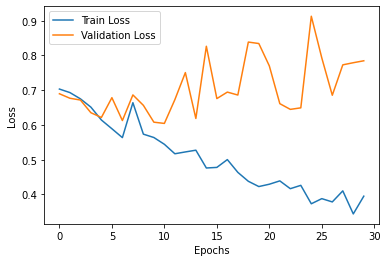

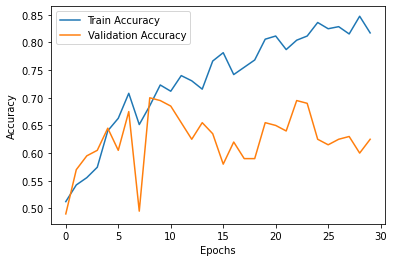

In [34]:
from matplotlib import pyplot as plt

plt.figure()
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.figure()
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')



###### checking with an image whether it is correctly predicted or not


In [36]:
import numpy as np

from tensorflow.keras.preprocessing import image

test_image = image.load_img('C:\\Users\\user\\Desktop\\ADV ML\\Train\\NON_COVID\\25%2.jpg',
                        target_size = (256, 256),color_mode='grayscale')
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
print(training_set.class_indices)
result = classifier.predict(test_image)
print('The test image is belongs to the class: ',result[0][0])

{'COVID_19': 0, 'NON_COVID': 1}
The test image is belongs to the class:  1.0


In [46]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image2 = image.load_img("C:\\Users\\user\\Desktop\\ADV ML\\Train\\COVID_19\\2020.02.11.20021493-p16-109%2.png",
                        target_size = (256, 256),color_mode='grayscale')
test_image2 = image.img_to_array(test_image2)
test_image2 = np.expand_dims(test_image2, axis = 0)
print(training_set.class_indices)
result = classifier.predict(test_image2)
print('The test image is belongs to the class: ',result[0][0])

{'COVID_19': 0, 'NON_COVID': 1}
The test image is belongs to the class:  1.0


###### The above resuts correctly predicting wheter the person is effected with covid or not.